In [28]:
import numpy as np
import pandas as pd
import preprocessing 
import metrics
import svm 
from sklearn.preprocessing import StandardScaler
from sklearn .metrics import accuracy_score
from sklearn .model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [29]:
df=pd.read_csv(r"C:\Users\nagar\Downloads\diabetes_prediction_dataset.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [31]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [32]:
df.head(11)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [33]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [34]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [35]:
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes
df['gender'] =  df['gender'].astype('category').cat.codes
df.head(11)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [36]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (4,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

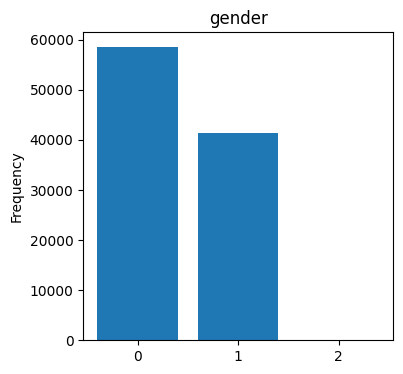

gender: 
 0    58552
1    41430
2       18
Name: gender, dtype: int64


,gender,diabetes
0,0,0.076189
1,1,0.097490
2,2,0.000000


In [37]:
category1 = ["gender"]
for c in category1:
    bar_plot(c)
df[["gender","diabetes"]].groupby(["gender"], as_index = False).mean().sort_values(by="gender")

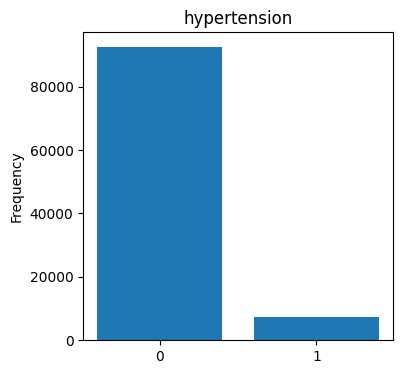

hypertension: 
 0    92515
1     7485
Name: hypertension, dtype: int64


,hypertension,diabetes
0,0,0.069308
1,1,0.278958


In [38]:
category2 = ["hypertension"]
for c2 in category2:
    bar_plot(c2)
df[["hypertension","diabetes"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="hypertension")

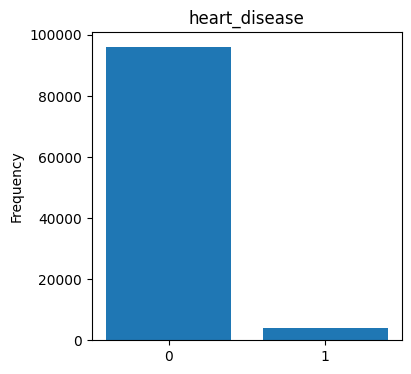

heart_disease: 
 0    96058
1     3942
Name: heart_disease, dtype: int64


,heart_disease,diabetes
0,0,0.075298
1,1,0.321410


In [39]:
category3 = ["heart_disease"]
for c3 in category3:
    bar_plot(c3)
df[["heart_disease","diabetes"]].groupby(["heart_disease"], as_index = False).mean().sort_values(by="heart_disease")

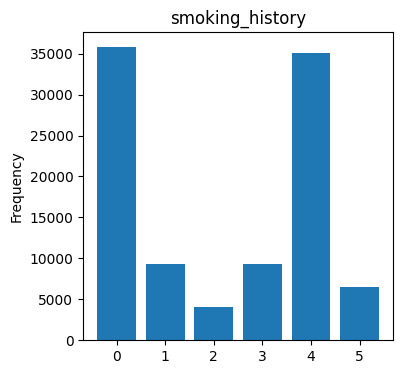

smoking_history: 
 0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: smoking_history, dtype: int64


,smoking_history,diabetes
0,0,0.040596
1,1,0.102089
2,2,0.117882
3,3,0.170017
4,4,0.095341
5,5,0.107027


In [40]:
category4 = ["smoking_history"]
for c4 in category4:
    bar_plot(c4)
df[["smoking_history","diabetes"]].groupby(["smoking_history"], as_index = False).mean().sort_values(by="smoking_history")


Smoking History:
-> No Info 35813 labeled as 0.
-> never 35071 labeled as 4.
-> former 9344 labeled as 3.
-> current 9275 labeled as 1.
-> not current 6443 labeled as 5.
-> ever 4002 labeled as 2.

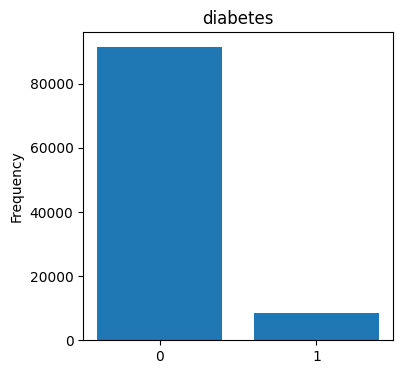

diabetes: 
 0    91500
1     8500
Name: diabetes, dtype: int64


In [41]:
category4 = ["diabetes"]
for c4 in category4:
    bar_plot(c4)

 Outlier Detection:
 Outliers are the entries that way above or way below than the average distribution of the data. We are going to check them with a function, then get rid of them.

In [42]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [43]:
df.loc[detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"])]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1135,0,62.0,1,1,4,43.16,8.8,280,1
1765,0,25.0,0,0,5,41.65,9.0,280,1
2622,0,57.0,1,0,1,45.13,8.8,280,1
5928,1,65.0,1,0,3,43.41,8.8,300,1
7480,1,38.0,0,0,1,69.66,8.8,300,1
8793,1,42.0,0,0,4,49.20,9.0,300,1
11400,0,64.0,0,0,4,41.92,9.0,260,1
12082,0,63.0,0,0,5,41.81,8.8,280,1
12942,0,62.0,0,0,4,43.49,9.0,300,1
17268,0,63.0,1,0,1,38.63,8.8,260,1


In [44]:
#Let's drop them.
df = df.drop(detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"]),axis = 0).reset_index(drop=True)

In [45]:
#Check again if we have any outlier values
df.loc[detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"])] 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


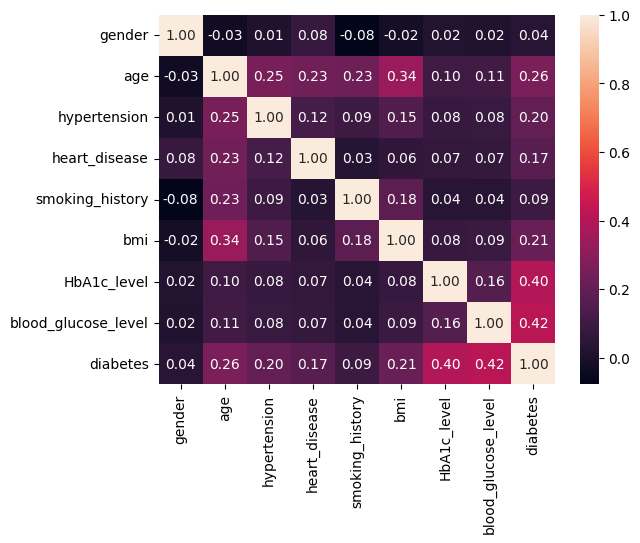

In [62]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

Opinions:
As we can see on the heat map, HbA1c Level and Blood Glucose Level is correlated with having diabetes. This might help us track a pattern of our data distribution. In fact, every other feature is correlated with diabetes, but the correlation level is not high like the mentioned features. Let's continue on visualizing.

[]

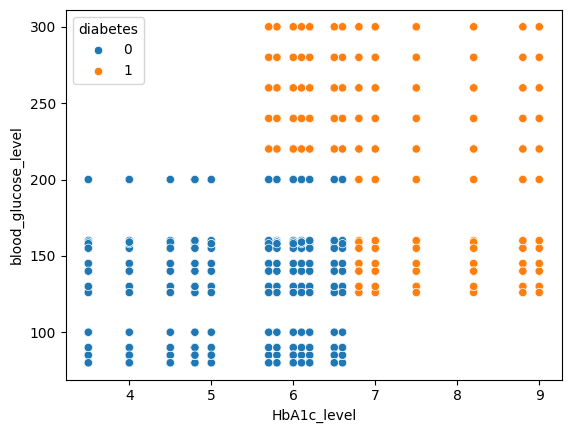

In [63]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data = df)
plt.plot()

Opinions:
Despite having intersections on HbA1c Level between 7-9 and Blood Glucose Level 200-300, it is clearly seen that we can develop a classification using these two features. The data we have is almost perfectly distributed with these two features. But other features would be irrelevant if we use only these two. So we will use them all while applying the machine learning models. But still, I will add a visualization of a neural network even though I won't code it here.

In [46]:
X_data = df.drop(labels = "diabetes", axis = 1)
y = df["diabetes"]
#Normalization
x = (X_data - np.min(X_data))/(np.max(X_data)-np.min(X_data))

c:\Users\nagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\nagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\nagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=

In [47]:
#Importing libraries.
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [48]:
#Manuplating our dataset for train and test seperation.
X_train = df.drop(labels = "diabetes", axis = 1)
y_train = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print("X Train: ",len(X_train))
print("X Test: ",len(X_test))
print("y Train: ",len(y_train))
print("y Test: ",len(y_test))

X Train:  79958
X Test:  19990
y Train:  79958
y Test:  19990


Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 96.04
Testing Accuracy: % 95.96


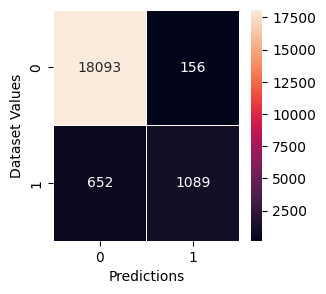

In [50]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

We have acquired an accuracy score like %96! Great! Let's try with other models to see if we can acquire a better score.

Decision Tree Classifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ",dt.score(X_test,y_test))

Score:  0.9526763381690846


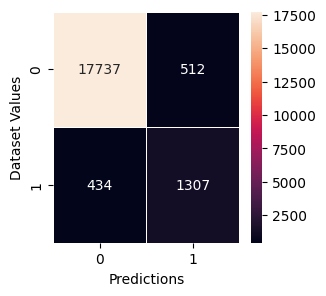

In [52]:
#Confusion Matrix
y_pred = dt.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

We have acquired %95.3 accuracy! Great! Let's go on with the other models.

K Neighbor Classification

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("{}NN Score: {} ".format(3,knn.score(X_test,y_test)))

3NN Score: 0.9593796898449225 


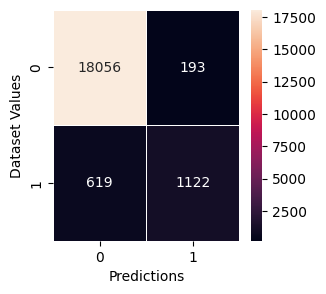

In [54]:
#Confusion Matrix
y_pred = knn.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

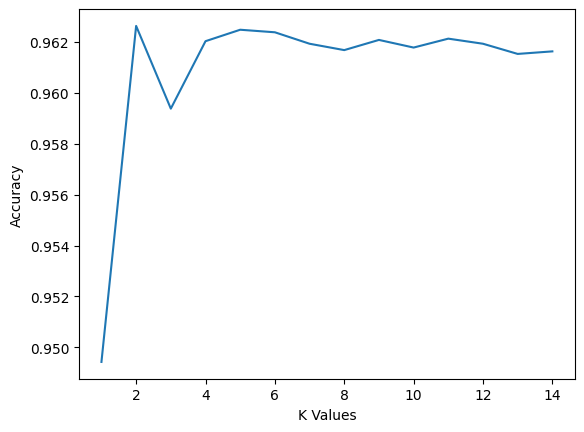

In [55]:
#Finding K Value
score_list= []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
plt.plot(range(1,15), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

As seen on the plot, we can acquire an accuracy score %96.2 by picking the K value as 11.

In [56]:
knn3 = KNeighborsClassifier(n_neighbors = 11)
knn3.fit(X_train,y_train)
prediction = knn3.predict(X_test)
print("{}NN Score: {} ".format(3,knn.score(X_test,y_test)))

3NN Score: 0.9593796898449225 


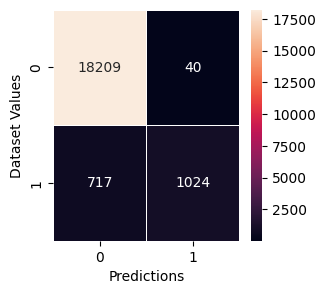

In [57]:
#Confusion Matrix
y_pred = knn3.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

Random Forest Classification

In [58]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train,y_train)
print("Random Forest Alg. Score: ",rf.score(X_test,y_test))

Random Forest Alg. Score:  0.9700850425212606


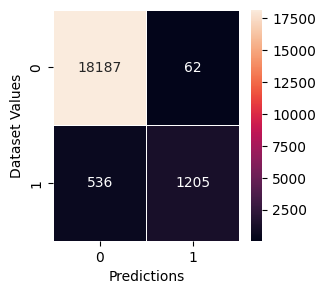

In [59]:
#Confusion Matrix
y_pred = rf.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

Here comes our best score! %97! This is the best accuracy we've acquired so far.

In [60]:
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("Accuracy of SVM Algo: ",svm.score(X_test,y_test))

Accuracy of SVM Algo:  0.9633316658329164


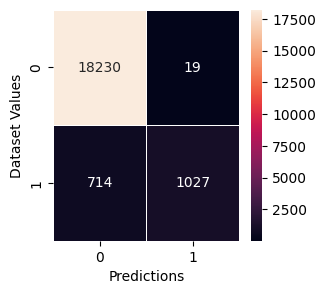

In [61]:
#Confusion Matrix
y_pred = svm.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()